In [ ]:
次元削減について
まず次元とはデータセットの特徴量の数と考えられる
次元削減とは、元の情報量を可能な限り残したまま入力データの次元数を減らすこと

次元削減を行うメリット
・意味解釈性の向上（３次元以内にすれば可視化も可能）
・学習させるパラメータの削減→計算時間の削減
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　→過学習が起きにくくなる

次元削減の種類
次元削減には、特徴選択と特徴抽出という２つの方法がある

特徴選択:データにもともと含まれる特徴量のうち、データ予測に有効なものを選ぶ方法
    
特徴抽出：データにもともと含まれる特徴量を合成して新しい特徴量を生み出す方法
　　　　　　　　　　　　　　　複数の特徴量を合成して、より少ない特徴量で同じレベルの精度で予測することが目標
    　　　　　　　　　　　手法として、主成分分析やt-SNEなどがある。
    



In [ ]:
主成分分析について
主成分分析とは一言で言うと、多次元データの情報を、情報量をできるだけ変えずにより少ない次元数で表現する手法
複数の特徴量から、新しい特徴量として合成変数を作成し、この合成変数を主成分というので主成分分析という

アルゴリズムについて
①全データを特徴空間上にプロットする
②データを標準化
③プロットされたデータから重心を求める
④求まった重心から、データのばらつき（分散）が最大となる方向を見つけてその方向に直線を得る（第一主成分）
⑤重心を通り、第一主成分と直交する直線の中で、その直線に各データを射影した際の分散が最大となるような直線を得る（第二主成分）
⑥目的となる主成分の数が得られるまで④の作業を繰り返す

寄与率
各主成分が元のデータをどれだけ説明できているかを表す数値

因子負荷量
各特徴量の各主成分への影響を示している
各主成分の意味を推定するために使われる

In [ ]:
主成分分析のイメージ

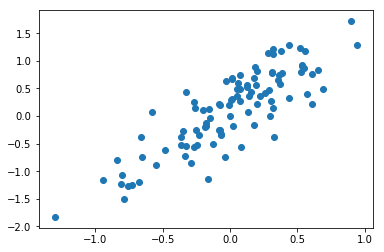

In [27]:
data = np.random.RandomState(2)
X = np.dot(data.rand(2, 2), rng_data.randn(2, 100)).T
plt.scatter(X[:, 0], X[:, 1])

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

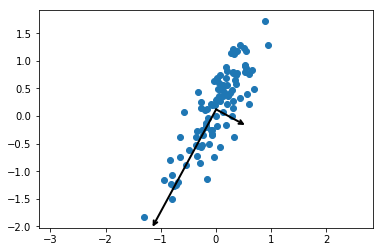

In [31]:
# パラメータ設定
arrowprops=dict(arrowstyle='->',
                linewidth=2,
                shrinkA=0, 
                shrinkB=0)

# 矢印を描くための関数
def draw_vector(v0, v1, ax=None):
    plt.gca().annotate('', v1, v0, arrowprops=arrowprops)

# 元のデータをプロット
plt.scatter(X[:, 0], X[:, 1], alpha=1)

# 主成分分析の2軸を矢印で表示する
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

In [ ]:
主成分分析の例

In [11]:
#ライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline

In [12]:
#データのロード
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [14]:
pd.DataFrame(data=iris.data, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  
X_std = scaler.fit_transform(X) 

In [16]:
# 主成分分析を実行
from sklearn.decomposition import PCA
pca = PCA(n_components=4) 
X_pca = pca.fit_transform(X_std)

In [17]:
# 寄与率を出力
# [第一主成分の寄与率 第二主成分の寄与率 ...]
print(pca.explained_variance_ratio_)

[0.72770452 0.23030523 0.03683832 0.00515193]


In [18]:
# 因子負荷量を出力
# ['sepal length', 'sepal width', 'petal length', 'petal width']
pca.components_ * np.sqrt(pca.explained_variance_)[:, np.newaxis]

array([[ 0.89122448, -0.44931298,  0.99168442,  0.96499579],
       [ 0.35735211,  0.88835148,  0.02024682,  0.06278622],
       [-0.276774  ,  0.09290825,  0.05408378,  0.24329495],
       [-0.03761047,  0.01782003,  0.11500878, -0.07515708]])

In [ ]:
主成分分析のアルゴリズムについて

In [ ]:
まず主成分分析は数学的には、「共分散行列を対角化する固有値問題」となります。

参考ブログ
「http://yusuke-ujitoko.hatenablog.com/entry/2017/03/04/193628」
「http://blog.aidemy.net/entry/2017/10/19/222941

In [ ]:
主成分分析のソースコードについて(C、C++)

In [ ]:
/* nag_mv_prin_comp (g03aac) Example Program.
 *
 * CLL6I261D/CLL6I261DL Version.
 *
 * Copyright 2017 Numerical Algorithms Group.
 *
 * Mark 26.1, 2017.
 *
 */

#include <nag.h>
#include <stdio.h>
#include <nag_stdlib.h>
#include <nagg03.h>

#define X(I, J) x[(I) *tdx + J]
#define P(I, J) p[(I) *tdp + J]
#define E(I, J) e[(I) *tde + J]
#define V(I, J) v[(I) *tdv + J]

int main(void)
{
  Integer exit_status = 0, i, *isx = 0, j, m, n, nvar, tde = 6, tdp, tdv, tdx;
  Nag_PrinCompMat matrix;
  Nag_PrinCompScores scores;
  Nag_Boolean weight;
  char nag_enum_arg[40];
  double *e = 0, *p = 0, *s = 0, *v = 0, *wt = 0, *wtptr = 0;
  double *x = 0;
  NagError fail;

  INIT_FAIL(fail);

  printf("nag_mv_prin_comp (g03aac) Example Program Results\n\n");

  /* Skip heading in data file */
  scanf("%*[^\n]");

  scanf("%39s", nag_enum_arg);
  /* nag_enum_name_to_value (x04nac).
   * Converts NAG enum member name to value
   */
  matrix = (Nag_PrinCompMat) nag_enum_name_to_value(nag_enum_arg);
  scanf("%39s", nag_enum_arg);
  scores = (Nag_PrinCompScores) nag_enum_name_to_value(nag_enum_arg);
  scanf("%39s", nag_enum_arg);
  weight = (Nag_Boolean) nag_enum_name_to_value(nag_enum_arg);
  scanf("%ld", &n);
  scanf("%ld", &m);

  if (n >= 2 && m >= 1) {
    if (!(x = NAG_ALLOC((n) * (m), double)) ||
        !(wt = NAG_ALLOC(n, double)) ||
        !(s = NAG_ALLOC(m, double)) || !(isx = NAG_ALLOC(m, Integer)))
    {
      printf("Allocation failure\n");
      exit_status = -1;
      goto END;
    }
    tdx = m;
  }
  else {
    printf("Invalid n or m.\n");
    exit_status = 1;
    return exit_status;
  }
  if (!weight) {
    for (i = 0; i < n; ++i) {
      for (j = 0; j < m; ++j)
        scanf("%lf", &X(i, j));
    }
  }
  else {
    for (i = 0; i < n; ++i) {
      for (j = 0; j < m; ++j)
        scanf("%lf", &X(i, j));
      scanf("%lf", &wt[i]);
    }
    wtptr = wt;
  }
  for (j = 0; j < m; ++j) {
    scanf("%ld", &isx[j]);
  }
  scanf("%ld", &nvar);
  if (nvar >= 1 && nvar <= MIN(n - 1, m)) {
    if (!(p = NAG_ALLOC(nvar * nvar, double)) ||
        !(e = NAG_ALLOC(nvar * 6, double)) ||
        !(v = NAG_ALLOC(n * nvar, double)))
    {
      printf("Allocation failure\n");
      exit_status = -1;
      goto END;
    }
    tdp = nvar;
    tde = 6;
    tdv = nvar;
  }
  else {
    printf("Invalid nvar.\n");
    exit_status = 1;
    goto END;
  }

  if (matrix == Nag_MatStandardised) {
    for (j = 0; j < m; ++j)
      scanf("%lf", &s[j]);
  }

  /* nag_mv_prin_comp (g03aac).
   * Principal component analysis
   */
  nag_mv_prin_comp(matrix, scores, n, m, x, tdx, isx, s, wtptr, nvar,
                   e, tde, p, tdp, v, tdv, &fail);
  if (fail.code != NE_NOERROR) {
    printf("Error from nag_mv_prin_comp (g03aac).\n%s\n", fail.message);
    exit_status = 1;
    goto END;
  }

  printf("Eigenvalues  Percentage  Cumulative     Chisq      DF     Sig\n");
  printf("               variation   variation\n\n");
  for (i = 0; i < nvar; ++i) {
    for (j = 0; j < 6; ++j)
      printf("%11.4f", E(i, j));
    printf("\n");
  }
  printf("\nPrincipal component loadings \n\n");
  for (i = 0; i < nvar; ++i) {
    for (j = 0; j < nvar; ++j)
      printf("%9.4f", P(i, j));
    printf("\n");
  }
  printf("\nPrincipal component scores \n\n");
  for (i = 0; i < n; ++i) {
    printf("%2ld", i + 1);
    for (j = 0; j < nvar; ++j)
      printf("%9.3f", V(i, j));
    printf("\n");
  }

END:
  NAG_FREE(x);
  NAG_FREE(wt);
  NAG_FREE(s);
  NAG_FREE(isx);
  NAG_FREE(p);
  NAG_FREE(e);
  NAG_FREE(v);

  return exit_status;
}
